# Mini-Project Quantum Computation - Grover's algorithm applied to a satisfiability problem

*Michael Glanznig, Ylva Schüch*

### Question 0)
We consider the predicate f defined as:
$$ 
f(x_0, x_1, x_2, x_3, x_4)= (\overline{x_0} \lor x_1) \wedge (x_0 \lor x_1 \lor \overline{x_2}) \wedge (x_2 \lor x_3)\wedge (\overline{x_1} \lor \overline{x_2} \lor x_3)\wedge (\overline{x_3} \lor \overline{x_4})\wedge (\overline{x_2} \lor \overline{x_3} \lor x_4).
$$

Find all possible solutions such that $$f(x_0, x_1, x_2, x_3, x_4)=1$$


The possible solutions are $(x_0,x_1,x_2,x_3,x_4)=\{(0,0,0,1,0), (0,1,0,1,0), (1,1,0,1,0)\}$

### Question 1)
Design the state preparation circuit.

The state preparation circuit consists of the initialization of the qubits $x_0$ to $x_4$ in state 0, which is done automatically in qiskit. These are the qubits $q_0$ to $q_4$. The qubit $y$ has to be initialized in state 1, which is done as qubit $q_5$ in the circuit. Then, Hadamard gates have to be applied to all qubits. To be able to link the state preparation circuit together with the oracle and reflection gate, we already have to add ancilla bits (qubit $q_6$ to $q_{11}$) as well. 

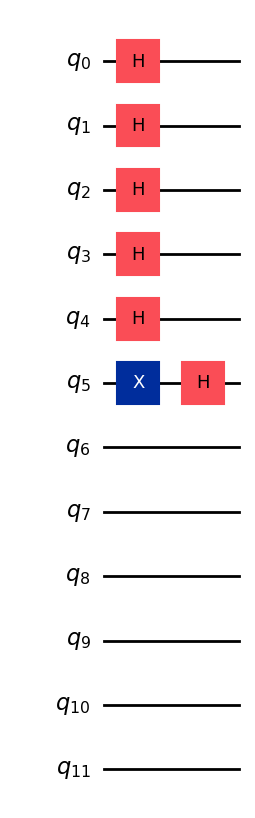

In [5]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
from qiskit import QuantumCircuit
from qiskit.circuit import Clbit
from qiskit.circuit.library import RC3XGate, MCXGate

#print(qiskit.__version__)
#print(qiskit_ibm_runtime.__version__)
#print(qiskit_aer.__version__)

circ = QuantumCircuit(12)
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.h(4)

circ.x(5)
circ.h(5)

Prep=circ.to_instruction(label=r'$Prepare$')


circ.draw('mpl')

### Question 2) 
Design the oracle $U_f$ such that $U_f|x_0, x_1, x_2, x_3, x_4, y> =|x_0, x_1, x_2, x_3, x_4> \otimes |f(x_0, x_1, x_2, x_3, x_4)>$.

Each clause of the function $f$ is rewritten using De Morgan's law to only use AND-statements, which are then implemented with a generalized Toffoli gate and an ancilla bit for each clause. 
The function $f$ therefore becomes:
$$
f= \neg (x_0 \wedge \overline{x_1}) \wedge \neg (\overline{x_0} \wedge \overline{x_1} \wedge x_2) \wedge \neg (\overline{x_2} \wedge \overline{x_3})\wedge \neg (x_1 \wedge x_2 \wedge \overline{x_3})\wedge \neg (x_3 \wedge x_4)\wedge \neg (x_2 \wedge x_3 \wedge \overline{x_4}).
$$
 

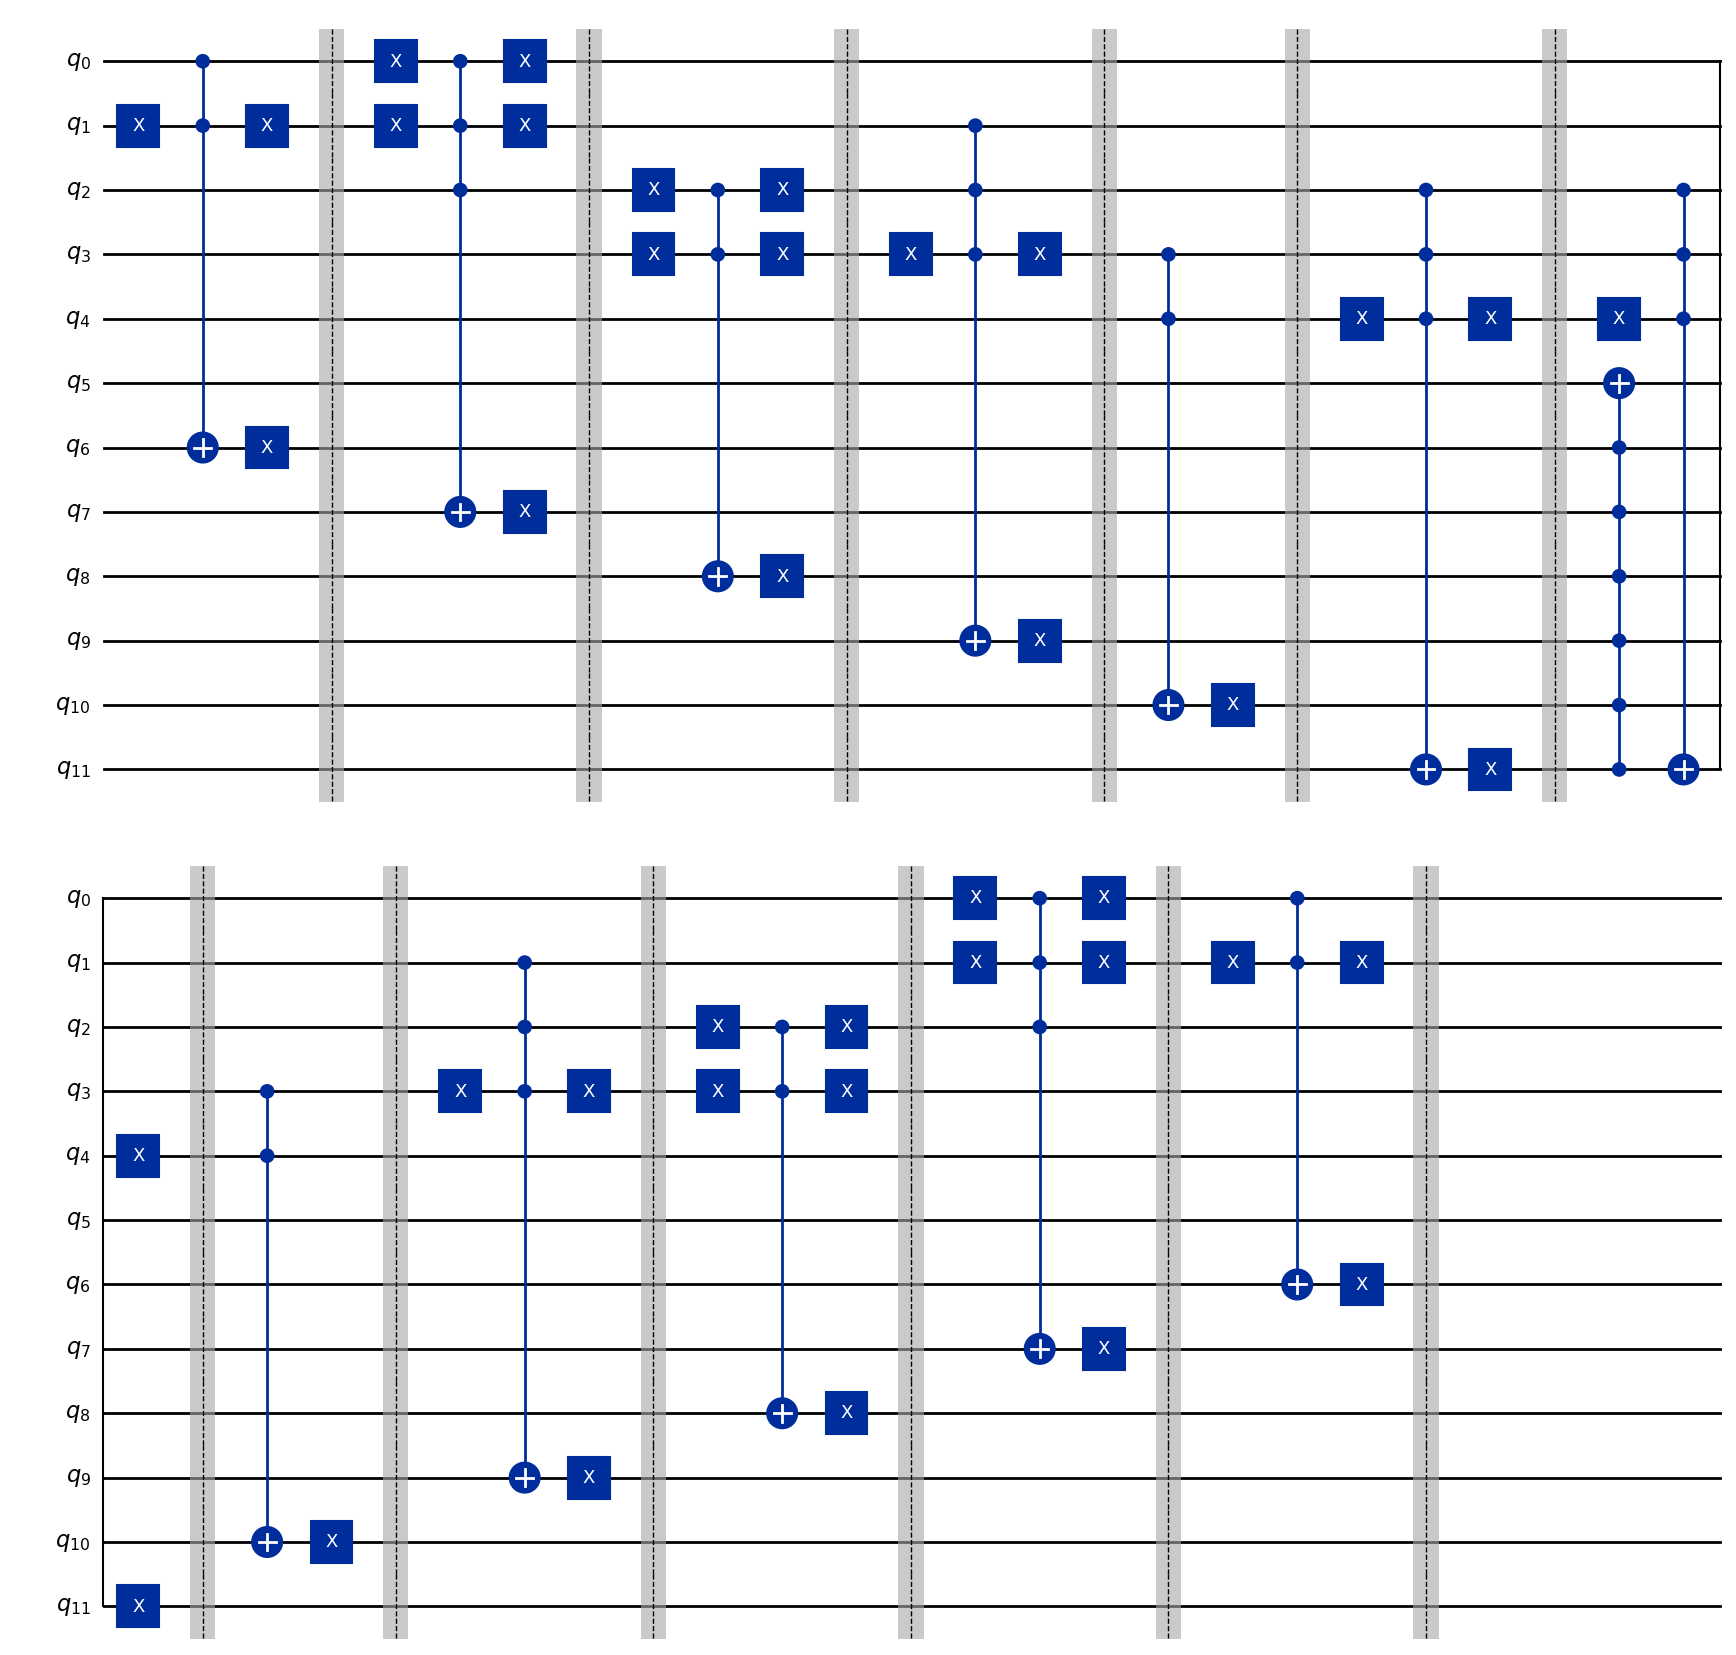

In [6]:
circ_o = QuantumCircuit(12)
circ_o.x(1)
circ_o.ccx(0,1,6)
circ_o.x(6)
circ_o.x(1)
circ_o.barrier()

circ_o.x(0)
circ_o.x(1)
circ_o.append(MCXGate(3), [0,1,2,7])
circ_o.x(7)
circ_o.x(0)
circ_o.x(1)
circ_o.barrier()

circ_o.x(2)
circ_o.x(3)
circ_o.ccx(2,3,8)
circ_o.x(8)
circ_o.x(2)
circ_o.x(3)
circ_o.barrier()

circ_o.x(3)
circ_o.append(MCXGate(3), [1,2,3,9])
circ_o.x(9)
circ_o.x(3)
circ_o.barrier()


circ_o.ccx(3,4,10)
circ_o.x(10)
circ_o.barrier()


circ_o.x(4)
circ_o.append(MCXGate(3), [2,3,4,11])
circ_o.x(11)
circ_o.x(4)
circ_o.barrier()


circ_o.append(MCXGate(6), [6,7,8,9,10,11,5])


circ_o.x(4)
circ_o.append(MCXGate(3), [2,3,4,11])
circ_o.x(11)
circ_o.x(4)
circ_o.barrier()


circ_o.ccx(3,4,10)
circ_o.x(10)
circ_o.barrier()


circ_o.x(3)
circ_o.append(MCXGate(3), [1,2,3,9])
circ_o.x(9)
circ_o.x(3)
circ_o.barrier()


circ_o.x(2)
circ_o.x(3)
circ_o.ccx(2,3,8)
circ_o.x(8)
circ_o.x(2)
circ_o.x(3)
circ_o.barrier()


circ_o.x(0)
circ_o.x(1)
circ_o.append(MCXGate(3), [0,1,2,7])
circ_o.x(7)
circ_o.x(0)
circ_o.x(1)
circ_o.barrier()


circ_o.x(1)
circ_o.ccx(0,1,6)
circ_o.x(6)
circ_o.x(1)
circ_o.barrier()

U_f=circ_o.to_instruction(label=r'$U_f$')
circ_o.draw('mpl')

### Question 3)
Design the reflection operator $R$. 

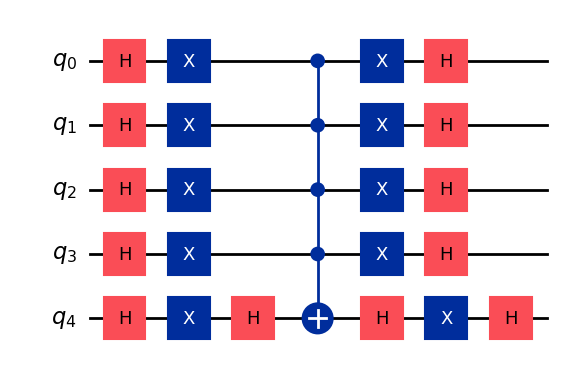

In [7]:
circ_r = QuantumCircuit(5)

circ_r.h(0)
circ_r.h(1)
circ_r.h(2)
circ_r.h(3)
circ_r.h(4)

circ_r.x(0)
circ_r.x(1)
circ_r.x(2)
circ_r.x(3)
circ_r.x(4)

circ_r.h(4)
circ_r.append(MCXGate(4), [0,1,2,3,4])
circ_r.h(4)

circ_r.x(0)
circ_r.x(1)
circ_r.x(2)
circ_r.x(3)
circ_r.x(4)

circ_r.h(0)
circ_r.h(1)
circ_r.h(2)
circ_r.h(3)
circ_r.h(4)

R=circ_r.to_instruction(label=r'$R$')
circ_r.draw('mpl')

### Question 4)
Run your circuit in the IBM Qiskit simulator (without noise and with noise), using $k$ times Grover’s operator $G = R · U_f$ in order to retrieve the solutions. Try different values of $k ∈ \{1, 2, 3, 4, . . . \}$ and see what value(s) lead(s) to the best results.
Please comment on the solutions you find and the presence of noise, drawing the appropriate corresponding graphs. What part of the noise is due to the algorithm itself and what part is due to the noise in the machine? Try both with the simulator and one of the real machines (your choice) and describe what you see.

First, the complete circuit is built from all the individual elements:

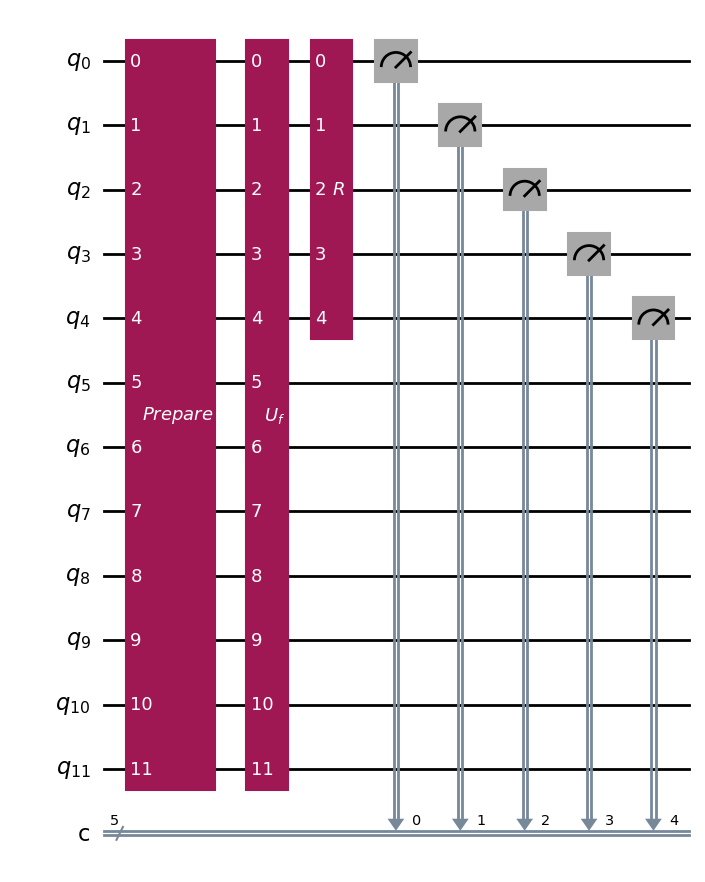

In [8]:
circ1 = QuantumCircuit(12,5)
circ1.append(Prep, [0,1,2,3,4,5,6,7,8,9,10,11] )
circ1.append(U_f, [0,1,2,3,4,5,6,7,8,9,10,11])
circ1.append(R, [0,1,2,3,4])

circ1.measure([0,1,2,3,4],[0,1,2,3,4])
circ1.draw('mpl')

Then, the circuit is transpiled to be run on the Qiskit simulator and we try a run with the ideal simulator:

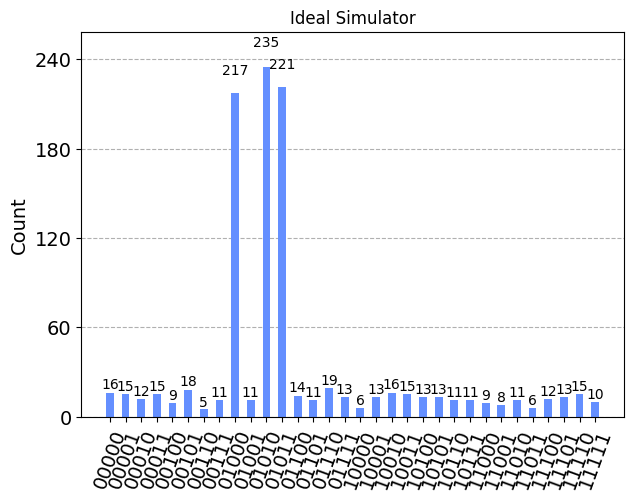

In [10]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService

simulator = AerSimulator()
circ1 = transpile(circ1, simulator)

# Run and get counts
result = simulator.run(circ1, shots=1024).result()
counts = result.get_counts(circ1)
plot_histogram(counts, title="Ideal Simulator")

The Grover operator now consists of the $U_f$-gate and the $R$ -Gate. We now want to apply the Grover operator multiple times. The "$\mathtt{grover\_k}$" function allows us to construct a circuit with $k$ times the Grover operator:

In [12]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService



def grover_k(k):
    #create circuit
    circ_grover = QuantumCircuit(12,5)
    
    circ_grover.append(Prep, [0,1,2,3,4,5,6,7,8,9,10,11] )
    #apply grover operatr k times
    for k in range(1,k+1): 
        circ_grover.append(U_f, [0,1,2,3,4,5,6,7,8,9,10,11])
        circ_grover.append(R, [0,1,2,3,4])
   
    circ_grover.measure([0,1,2,3,4],[0,1,2,3,4])
   
    #run circuit in simulator and get counts
    simulator = AerSimulator()
    circ_grover_t = transpile(circ_grover, simulator)

    result = simulator.run(circ_grover_t, shots=1024).result()
    counts = result.get_counts()
    return counts

Obviously, we are interested in the results and want to plot them! In order to do so, we need a three-dimensional plot to show both the k-value, the number of counts and the resulting output. We therefore chose a heatmap plot:

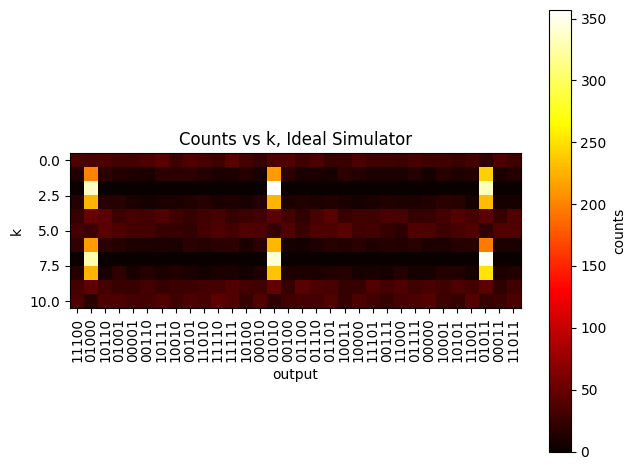

In [14]:
import matplotlib.pyplot as plt
import numpy as np

count=[]
for k in range(11):
    count.append(grover_k(k))

    
bit_strings = list(count[0].keys())
num_data = [[result.get(bit, 0) for bit in bit_strings] for result in count]

# Create heatmap plot
plt.imshow(num_data, cmap='hot')

# Set plot labels and title
plt.title('Counts vs k, Ideal Simulator')
plt.xlabel('output')
plt.ylabel('k')
plt.xticks(np.arange(len(bit_strings)), bit_strings, rotation=90)
plt.colorbar(label='counts')
plt.tight_layout()
plt.show()

The vertical axis shows the value for $k$, the horizontal axis shows the output bistring and the colour shows how many counts there were for each output for a given $k$. We can see that the algorithm yields the expected outputs  ($\{(0,0,0,1,0), (0,1,0,1,0), (1,1,0,1,0)\}$, note that the order of the ouput bits is reversed!) when the Grover operator was applied $1,2,3$ or $6,7,8$ times. A "perfect result", i.e. zero counts for all undesired outputs, is only achieved for $k=2$ and $k=7$.

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Load saved credentials
service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [15]:
TOKEN = "056f10522b8aea5782024720261a5d90be4cac4e3fb72c5abad13f861c24545821b1006d25d59a2078e2c9d31015438c95a7b646fc4459cbe40f43d0aa515e37"

# One-time access:
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

QiskitRuntimeService.save_account(channel="ibm_quantum", token=TOKEN, set_as_default=True, overwrite=True)

backend_true = service.least_busy(operational=True, simulator=False, min_num_qubits=2)
backend_true.configuration().basis_gates



backend = service.backend("ibm_osaka")
noise_model = NoiseModel.from_backend(backend)

def grover_k_noise(k):
    #create circuit
    circ_grover = QuantumCircuit(12,5)
    
    circ_grover.append(Prep, [0,1,2,3,4,5,6,7,8,9,10,11] )
    #apply grover operator k times
    for k in range(1,k+1): 
        circ_grover.append(U_f, [0,1,2,3,4,5,6,7,8,9,10,11])
        circ_grover.append(R, [0,1,2,3,4])
   
    circ_grover.measure([0,1,2,3,4],[0,1,2,3,4])
   
    #run circuit in simulator and get counts
    sim_ideal_w_noise = AerSimulator(noise_model=noise_model)  # construct simulator
    circ_grover_t = transpile(circ_grover, sim_ideal_w_noise)

    result = sim_ideal_w_noise.run(circ_grover_t, shots=1024).result()
    counts = result.get_counts()
    return counts

count=[]
for k in range(11):
    count.append(grover_k_noise(k))

    
bit_strings = list(count[0].keys())
num_data = [[result.get(bit, 0) for bit in bit_strings] for result in count]

# Create heatmap plot
plt.imshow(num_data, cmap='hot' )

# Set plot labels and title
plt.title('Counts vs k, Noisy Simulator')
plt.xlabel('output')
plt.ylabel('k')
plt.xticks(np.arange(len(bit_strings)), bit_strings, rotation=90)
plt.colorbar(label='counts')
plt.tight_layout()
plt.show()

As we can see, the noisy simulator produces a very different result than the ideal one. The resulting counts for the different outputs seem randomized and cannot be used to determine the solutions. Moreover, no periodicity is detected. 


We also test the algorithm on one of IBM's real quantum machines:

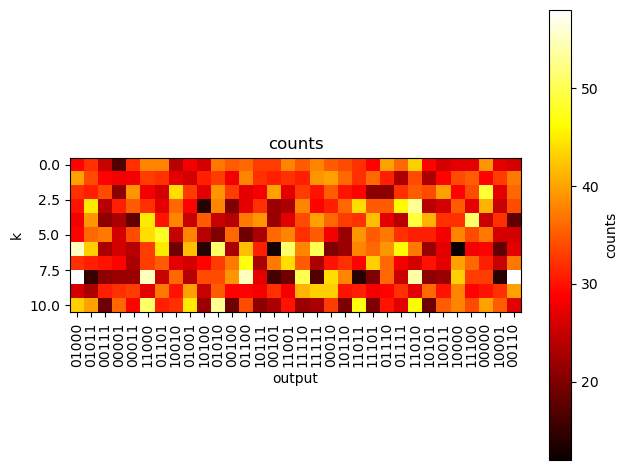

In [13]:
#real machine
def grover_k_real(k):
    #create circuit
    circ_grover = QuantumCircuit(12,5)
    
    circ_grover.append(Prep, [0,1,2,3,4,5,6,7,8,9,10,11] )
    #apply grover operator k times
    for k in range(1,k+1): 
        circ_grover.append(U_f, [0,1,2,3,4,5,6,7,8,9,10,11])
        circ_grover.append(R, [0,1,2,3,4])
   
    circ_grover.measure([0,1,2,3,4],[0,1,2,3,4])
   
    #run circuit in simulator and get counts
    backend_true = service.least_busy(operational=True, simulator=False, min_num_qubits=2)
    circ_grover_t = transpile(circ_grover, backend_true)
    
    
    job_true = backend_true.run(circ_grover_t, shots=1024)
    res_true = job_true.result()

    counts = res_true.get_counts()
    return counts

count=[]
for k in range(11):
    count.append(grover_k_real(k))

    
bit_strings = list(count[0].keys())
num_data = [[result.get(bit, 0) for bit in bit_strings] for result in count]

# Create heatmap plot
plt.imshow(num_data, cmap='hot' )

# Set plot labels and title
plt.title('Counts vs k, Real Machine')
plt.xlabel('output')
plt.ylabel('k')
plt.xticks(np.arange(len(bit_strings)), bit_strings, rotation=90)
plt.colorbar(label='counts')
plt.tight_layout()
plt.show()

Again, we can observe that we do not get a clear result. The output resembles the one from the noisy simulator, indicating that the unclear result stems from noise in the real machine as well, and not from the algorithm itself, since the expected result was obtained very clearly from the ideal simulator.

### Question 5)
Now, using the answer to question 0): at what initial angle $\theta_0$ does the algorithm
start, and how many times should Grover’s operator be applied, ideally?

We know that $M=3$ and $N=32$. Therefore, $\sin (\theta_0)=\sqrt{\frac{3}{32}} \rightarrow \theta_0=0.311$ radians. With this, we can determine the optimal number of $k$, as $k$ is ideal when $|\sin((2k+1)\theta_0)|=1$. This function is plotted below, and as we can see, the optimal number of $k$ for $k \in [0,10]$ is $k=2$ or $k=7$.

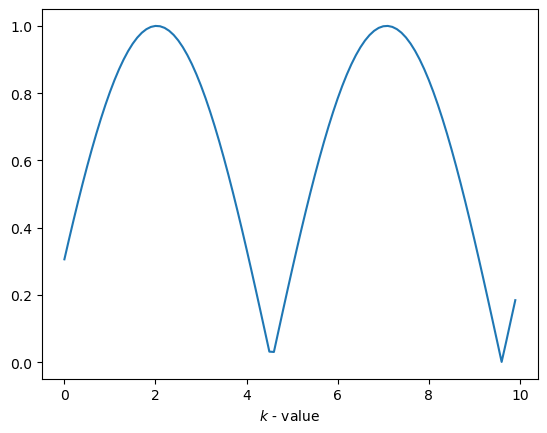

In [20]:
x=np.arange(0,10, 0.1)
plt.plot(x, np.abs(np.sin((2*x+1)*0.311)))
plt.xlabel(r'$k$ - value')
plt.show()